# Lab #2

Student Name: Nabhanya Sharma

Student ID: 500826185

Video demo:https://www.loom.com/share/c4c492f6fb2b41daad43131f68253378


In [77]:

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras


Q1:

In [78]:
def create_data():
  x=np.random.uniform(low=-1,high=1,size=(30000,1))
  y=0.2*x**4+2*x**3+0.1*x**2+10
  
  return x,y

Q2:

In [79]:
def shuffle_data(x,y):
  x1=shuffle(x)
  y1=shuffle(y)
  return x,y 

Q3:

In [80]:
def split_data(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.4)
  return x_train, x_test, x_val, y_train, y_test, y_val

Q4:

In [81]:
def scale_data(x):
  x = np.interp(x, (x.min(), x.max()), (0, 1))
  return x

Q5:

In [82]:
def calculate(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    return mae, mse, rmse, r2

Model Function:

In [83]:
def create_structure(structure,activation):
  model = tf.keras.Sequential()
  if structure==1:
    model.add(tf.keras.layers.Dense(12, activation=activation))
    model.add(tf.keras.layers.Dense(8, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation=activation))
       
  elif structure==2:
    model.add(tf.keras.layers.Dense(24, activation=activation))
    model.add(tf.keras.layers.Dense(1,activation))  
    
  model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
  return model 

In [84]:
def create_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
  model.fit(x_train,y_train, epochs=20,batch_size=12, validation_data=(x_val,y_val))
  y_pred=model.predict(x_test)
  
  mae, mse, rmse, r2 = calculate(y_test, y_pred)

  plt.scatter(x_test, y_test)
  plt.xlabel('x_test')
  plt.ylabel('y_test')
  plt.title('Actual')
  plt.show()
  plt.scatter(x_test, y_pred)
  plt.xlabel('x_test')
  plt.ylabel('y_test')
  plt.title('Predicted')
  plt.show()
  print("MAE:", mae)
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("R2 Score:", r2)

## Shuffled

In [85]:
x,y=create_data()
x_shuffle,y_shuffle=shuffle_data(x,y)
x_train, x_test, x_val, y_train, y_test, y_val = split_data(x_shuffle, y_shuffle)

Case 1:

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 102.0068 - mae: 10.0702 - mse: 102.0068 - val_loss: 102.3993 - val_mae: 10.0897 - val_mse: 102.3993
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 102.0067 - mae: 10.0702 - mse: 102.0067 - val_loss: 102.3993 - val_mae: 10.0897 - val_mse: 102.3993
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0067 - mae: 10.0702 - mse: 102.0067 - val_loss: 102.3993 - val_mae: 10.0897 - val_mse: 102.3993
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0067 - mae: 10.0702 - mse: 102.0067 - val_loss: 102.3993 - val_mae: 10.0897 - val_mse: 102.3993
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0068 - mae: 10.0702 - mse: 102.0068 - val_loss: 102.3993 - val_mae: 10.0897 - val_mse: 102.3993
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0067 - mae: 10.0702 - mse: 102.0067 - val_loss: 102.

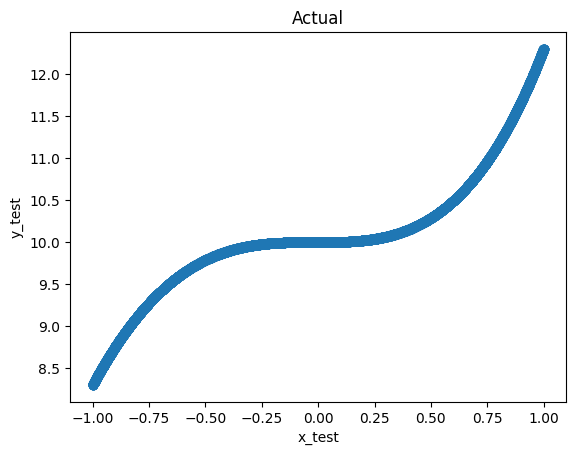

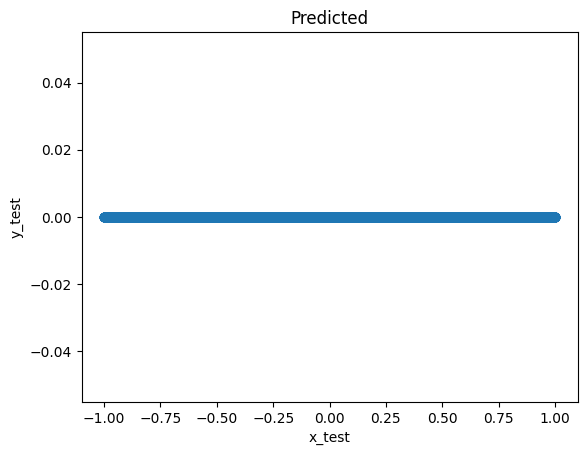

MAE: 10.069890636413454
MSE: 101.97187985823513
RMSE: 10.098112687935064
R2 Score: -178.1550031752014


In [86]:
model=create_structure(1,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 2:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 38.2143 - mae: 5.2356 - mse: 38.2143 - val_loss: 0.2499 - val_mae: 0.4218 - val_mse: 0.2499
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0869 - mae: 0.2443 - mse: 0.0869 - val_loss: 0.0682 - val_mae: 0.2172 - val_mse: 0.0682
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0579 - mae: 0.2005 - mse: 0.0579 - val_loss: 0.0517 - val_mae: 0.1860 - val_mse: 0.0517
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0459 - mae: 0.1735 - mse: 0.0459 - val_loss: 0.0435 - val_mae: 0.1679 - val_mse: 0.0435
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0403 - mae: 0.1595 - mse: 0.0403 - val_loss: 0.0390 - val_mae: 0.1517 - val_mse: 0.0390
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0349 - mae: 0.1463 - mse: 0.0349 - val_loss: 0.0316 - val_mae: 0.1407 - val_mse: 0.0316
Epoch 7/20
750

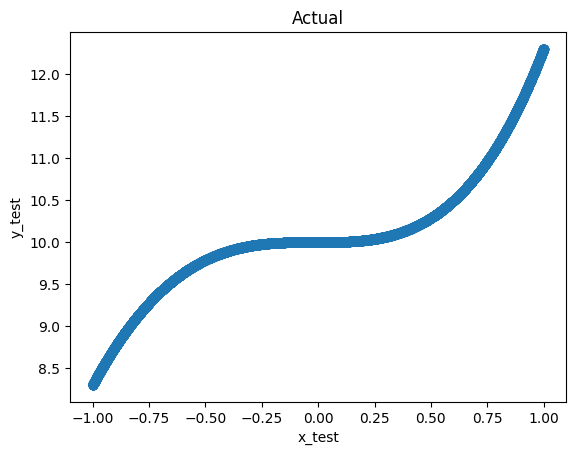

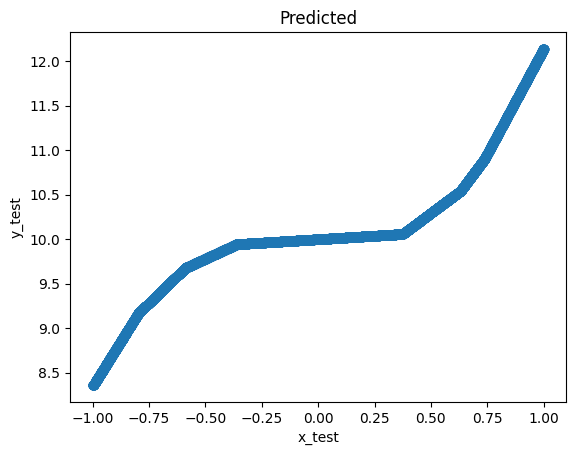

MAE: 0.0164045279005805
MSE: 0.000647300288220403
RMSE: 0.025442096773269356
R2 Score: 0.9988822969520044


In [67]:
model=create_structure(2,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 3:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 84.7302 - mae: 9.1728 - mse: 84.7302 - val_loss: 83.1111 - val_mae: 9.0841 - val_mse: 83.1111
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 82.8626 - mae: 9.0712 - mse: 82.8626 - val_loss: 83.0813 - val_mae: 9.0824 - val_mse: 83.0813
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 82.8488 - mae: 9.0704 - mse: 82.8488 - val_loss: 83.0750 - val_mae: 9.0821 - val_mse: 83.0750
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 82.8449 - mae: 9.0702 - mse: 82.8449 - val_loss: 83.0727 - val_mae: 9.0820 - val_mse: 83.0727
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 82.8433 - mae: 9.0701 - mse: 82.8433 - val_loss: 83.0716 - val_mae: 9.0819 - val_mse: 83.0716
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 82.8424 - mae: 9.0701 - mse: 82.8424 - val_loss: 83.0709 - val_mae: 9.0819 - val_mse: 

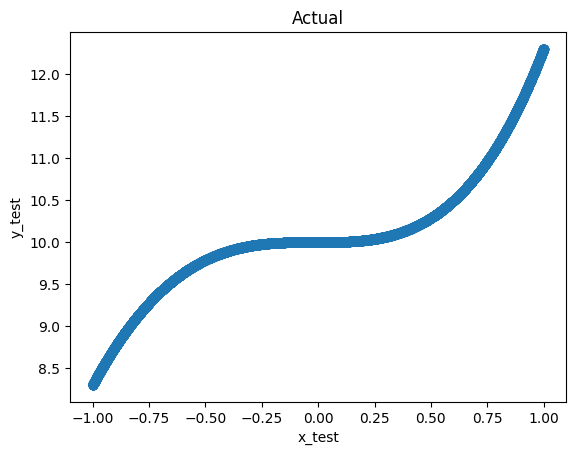

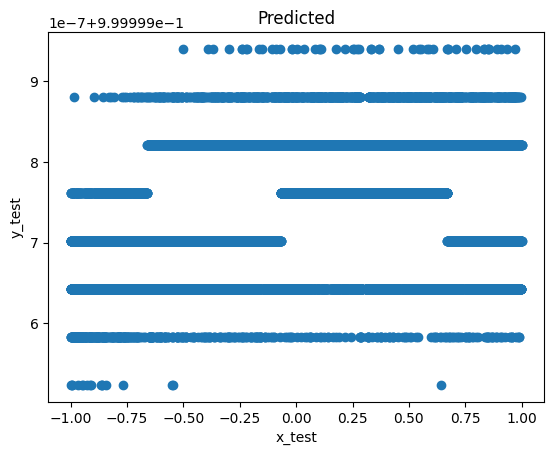

MAE: 9.084080357280788
MSE: 83.09965031577983
RMSE: 9.11590096017831
R2 Score: -142.48940381390867


In [68]:
model=create_structure(1,'tanh')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 4:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0103 - mae: 0.0731 - mse: 0.0103 - val_loss: 0.0060 - val_mae: 0.0640 - val_mse: 0.0060
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0059 - mae: 0.0631 - mse: 0.0059 - val_loss: 0.0059 - val_mae: 0.0629 - val_mse: 0.0059
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0059 - mae: 0.0623 - mse: 0.0059 - val_loss: 0.0058 - val_mae: 0.0617 - val_mse: 0.0058
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0058 - mae: 0.0615 - mse: 0.0058 - val_loss: 0.0059 - val_mae: 0.0623 - val_mse: 0.0059
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0609 - mse: 0.0057 - val_loss: 0.0057 - val_mae: 0.0602 - val_mse: 0.0057
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0601 - mse: 0.0057 - val_loss: 0.0057 - val_mae: 0.0593 - val_mse: 0.0057
Epoch 7/20
750/7

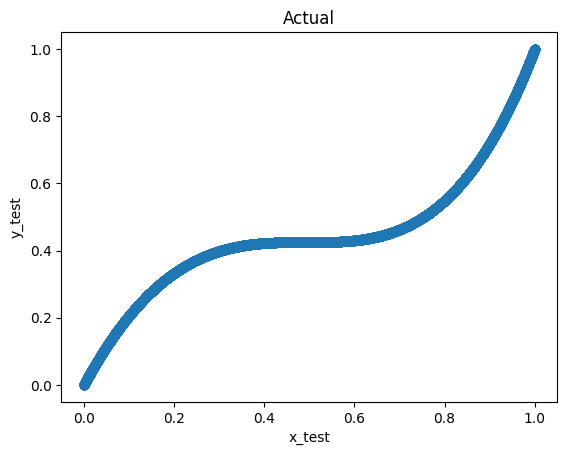

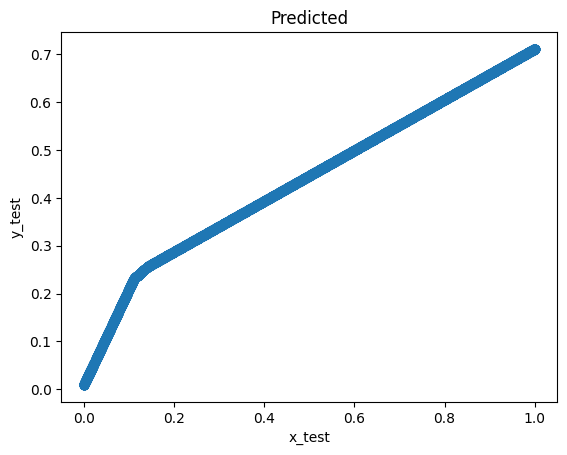

MAE: 0.054413598561580095
MSE: 0.00545683254058035
RMSE: 0.07387037661052195
R2 Score: 0.8495086676705058


In [69]:
x_train=scale_data(x_train)
y_train=scale_data(y_train)
x_val=scale_data(x_val)
y_val=scale_data(y_val)
x_test=scale_data(x_test)
y_test=scale_data(y_test)
model=create_structure(1,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 5:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0093 - mae: 0.0723 - mse: 0.0093 - val_loss: 0.0075 - val_mae: 0.0687 - val_mse: 0.0075
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0075 - mae: 0.0685 - mse: 0.0075 - val_loss: 0.0075 - val_mae: 0.0673 - val_mse: 0.0075
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0685 - mse: 0.0074 - val_loss: 0.0077 - val_mae: 0.0691 - val_mse: 0.0077
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0685 - mse: 0.0074 - val_loss: 0.0074 - val_mae: 0.0682 - val_mse: 0.0074
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0684 - mse: 0.0074 - val_loss: 0.0074 - val_mae: 0.0684 - val_mse: 0.0074
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0683 - mse: 0.0074 - val_loss: 0.0075 - val_mae: 0.0679 - val_mse: 0.0075
Epoch 7/20
750/7

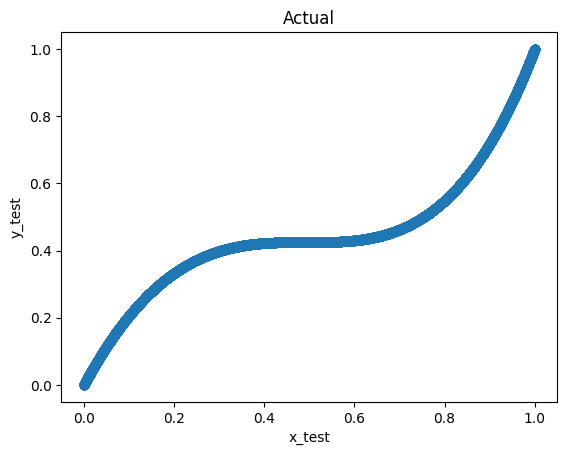

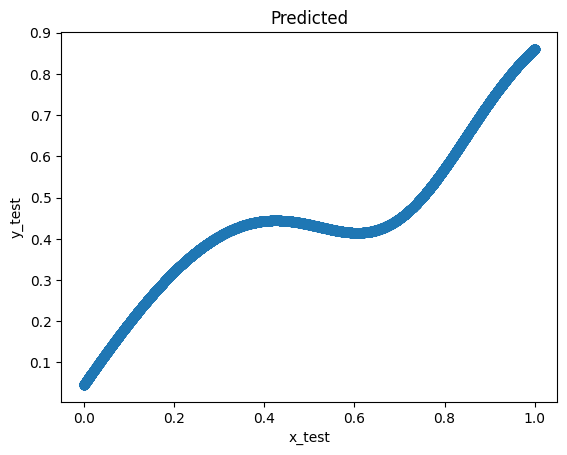

MAE: 0.018091096193825193
MSE: 0.0006660851611406705
RMSE: 0.02580862571197216
R2 Score: 0.9816303610932682


In [70]:
model=create_structure(1,'tanh')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

### Unshuffled

Case 1:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 18.5074 - mae: 2.7323 - mse: 18.5074 - val_loss: 0.3236 - val_mae: 0.4249 - val_mse: 0.3236
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1675 - mae: 0.2941 - mse: 0.1675 - val_loss: 0.0887 - val_mae: 0.2114 - val_mse: 0.0887
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0575 - mae: 0.1813 - mse: 0.0575 - val_loss: 0.0446 - val_mae: 0.1645 - val_mse: 0.0446
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0435 - mae: 0.1621 - mse: 0.0435 - val_loss: 0.0446 - val_mae: 0.1571 - val_mse: 0.0446
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0433 - mae: 0.1579 - mse: 0.0433 - val_loss: 0.0483 - val_mae: 0.1702 - val_mse: 0.0483
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0434 - mae: 0.1586 - mse: 0.0434 - val_loss: 0.0435 - val_mae: 0.1506 - val_mse: 0.0435
Epoch 7/20
750

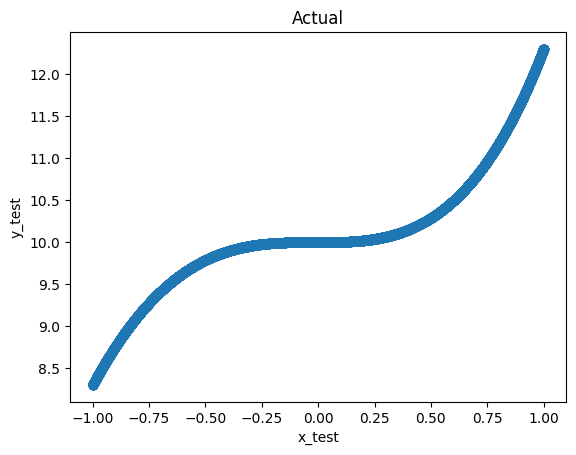

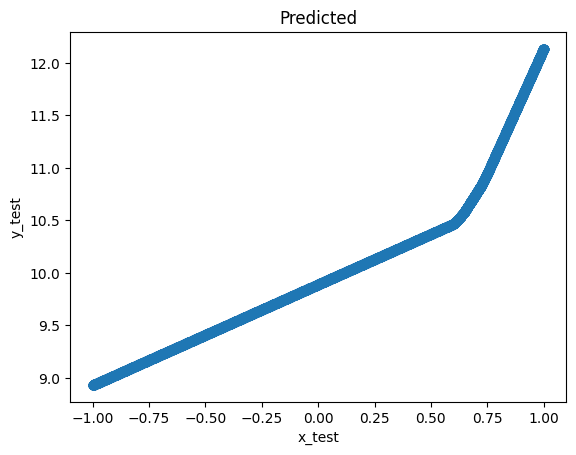

MAE: 0.16769120697790027
MSE: 0.04828098552097558
RMSE: 0.2197293460623218
R2 Score: 0.9171898884813634


In [71]:
x_train, x_test, x_val, y_train, y_test, y_val = split_data(x, y)
model=create_structure(1,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 2:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 102.0764 - mae: 10.0752 - mse: 102.0764 - val_loss: 102.2771 - val_mae: 10.0837 - val_mse: 102.2771
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0765 - mae: 10.0752 - mse: 102.0765 - val_loss: 102.2771 - val_mae: 10.0837 - val_mse: 102.2771
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0765 - mae: 10.0752 - mse: 102.0765 - val_loss: 102.2771 - val_mae: 10.0837 - val_mse: 102.2771
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0764 - mae: 10.0752 - mse: 102.0764 - val_loss: 102.2771 - val_mae: 10.0837 - val_mse: 102.2771
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0765 - mae: 10.0752 - mse: 102.0765 - val_loss: 102.2771 - val_mae: 10.0837 - val_mse: 102.2771
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 102.0764 - mae: 10.0752 - mse: 102.0764 - val_loss: 102.

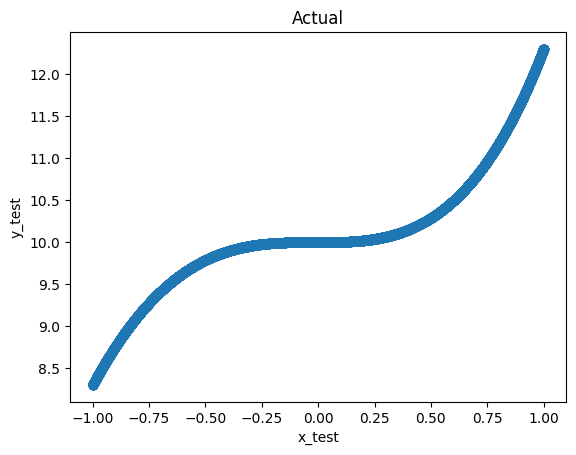

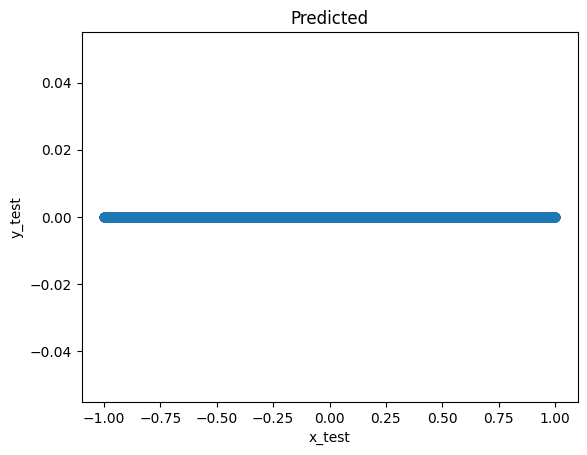

MAE: 10.080180565434922
MSE: 102.19307272183333
RMSE: 10.109058943434514
R2 Score: -174.27852128972353


In [72]:
model=create_structure(2,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 3:

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 84.8614 - mae: 9.1800 - mse: 84.8614 - val_loss: 83.1579 - val_mae: 9.0864 - val_mse: 83.1579
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 82.9506 - mae: 9.0765 - mse: 82.9506 - val_loss: 83.1222 - val_mae: 9.0844 - val_mse: 83.1222
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 82.9344 - mae: 9.0756 - mse: 82.9344 - val_loss: 83.1151 - val_mae: 9.0841 - val_mse: 83.1152
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 82.9301 - mae: 9.0754 - mse: 82.9301 - val_loss: 83.1126 - val_mae: 9.0839 - val_mse: 83.1126
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 82.9283 - mae: 9.0753 - mse: 82.9283 - val_loss: 83.1113 - val_mae: 9.0838 - val_mse: 83.1113
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 82.9275 - mae: 9.0753 - mse: 82.9275 - val_loss: 83.1107 - val_mae: 9.0838 - val_mse: 

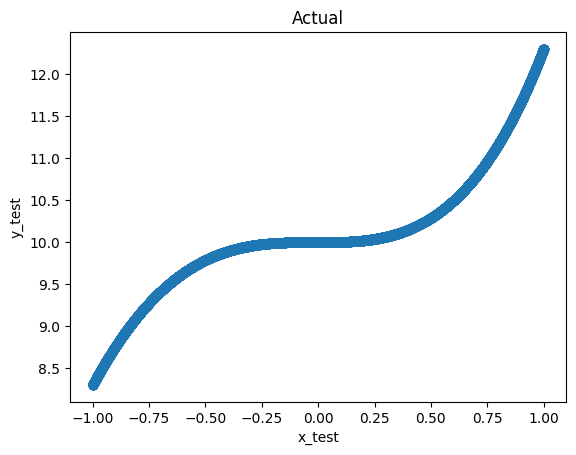

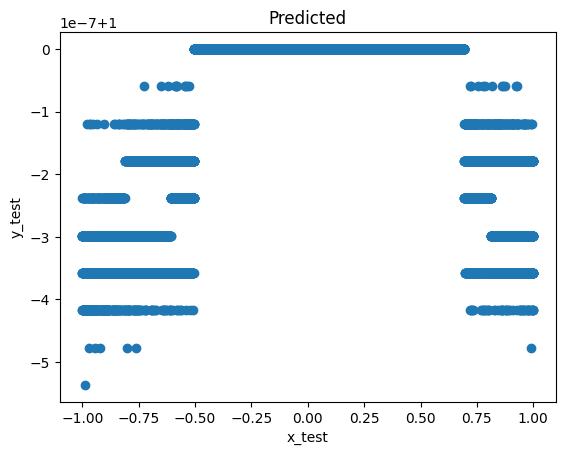

MAE: 9.080180674880973
MSE: 83.03271355849463
RMSE: 9.112228792040652
R2 Score: -141.41524267326116


In [73]:
model=create_structure(1,'tanh')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 4:



Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2330 - mae: 0.4443 - mse: 0.2330 - val_loss: 0.2365 - val_mae: 0.4463 - val_mse: 0.2365
Epoch 7/20
750/7

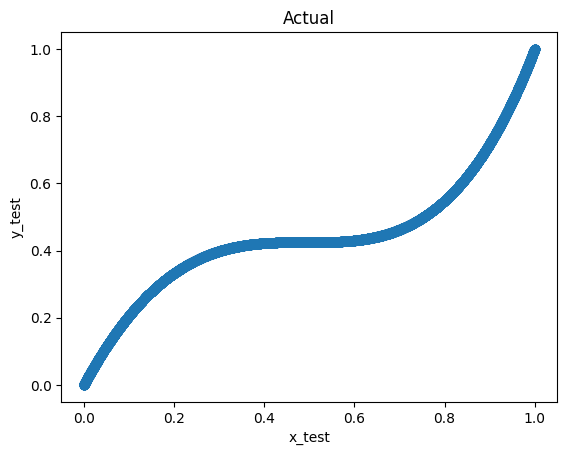

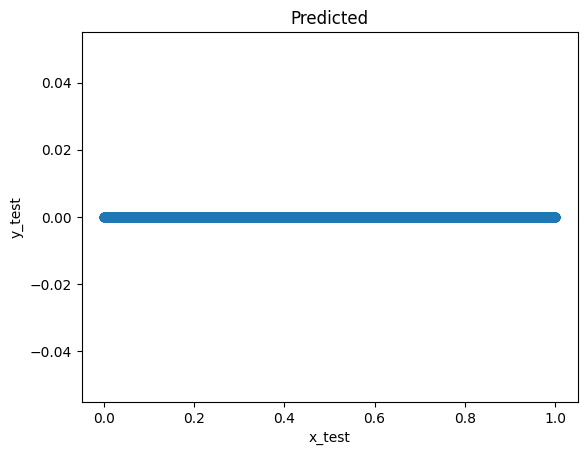

MAE: 0.44493146751957025
MSE: 0.23443778729277143
RMSE: 0.4841877603706763
R2 Score: -5.42757097744707


In [74]:
x_train=scale_data(x_train)
y_train=scale_data(y_train)
x_val=scale_data(x_val)
y_val=scale_data(y_val)
x_test=scale_data(x_test)
y_test=scale_data(y_test)
model=create_structure(1,'relu')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)

Case 5:

Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 0.0129 - mae: 0.0781 - mse: 0.0129 - val_loss: 0.0075 - val_mae: 0.0688 - val_mse: 0.0075
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0075 - mae: 0.0686 - mse: 0.0075 - val_loss: 0.0075 - val_mae: 0.0685 - val_mse: 0.0075
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0075 - mae: 0.0685 - mse: 0.0075 - val_loss: 0.0074 - val_mae: 0.0689 - val_mse: 0.0074
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0073 - mae: 0.0681 - mse: 0.0073 - val_loss: 0.0074 - val_mae: 0.0686 - val_mse: 0.0074
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0072 - mae: 0.0679 - mse: 0.0072 - val_loss: 0.0071 - val_mae: 0.0687 - val_mse: 0.0071
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0071 - mae: 0.0677 - mse: 0.0071 - val_loss: 0.0073 - val_mae: 0.0690 - val_mse: 0.0073
Epoch 7/20
750/7

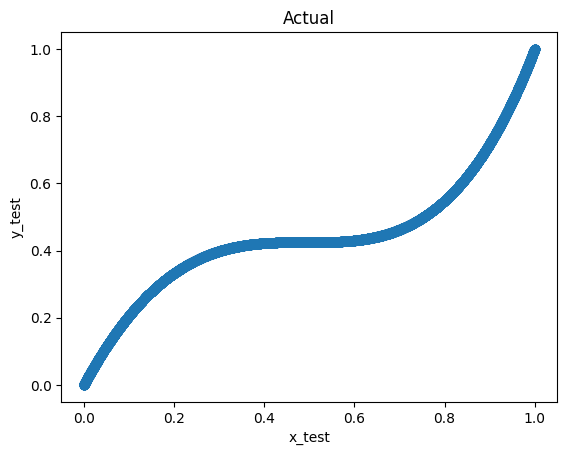

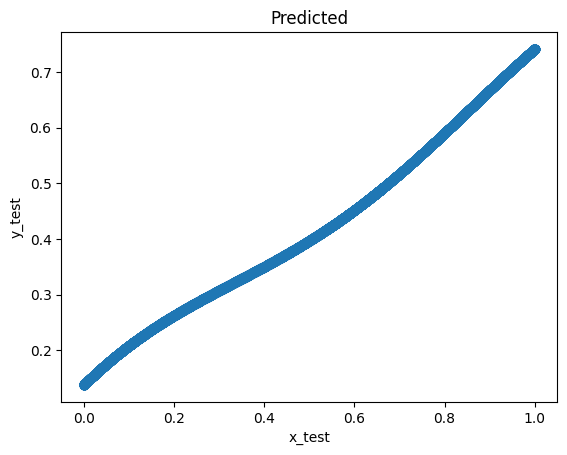

MAE: 0.05986659687457529
MSE: 0.005493447566822454
RMSE: 0.07411779521020882
R2 Score: 0.849386378559614


In [75]:
model=create_structure(1,'tanh')
create_model(model,x_train, y_train, x_val, y_val, x_test, y_test)